In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for evaluation
from sklearn.metrics import mean_absolute_error, r2_score, classification_report,confusion_matrix , accuracy_score, f1_score
import sys
import time
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_excel('/content/gamma_stft.xlsx',sheet_name='S-Z')
df.head()

,mean,variance,skewness,kurtosis
0,12.466769,351.389569,1.355803,4.392854
1,20.642700,1068.050678,1.362178,4.245450
2,16.890266,689.796409,1.694983,6.497073
3,4.183841,36.506889,1.246755,4.294954
4,12.672505,396.686673,1.346155,4.098919


In [10]:
target = pd.read_excel('/content/gamma_stft.xlsx',sheet_name='targetS-Z')

In [11]:
target

,target
0,1
1,1
2,1
3,1
4,1
...,...
195,0
196,0
197,0
198,0


In [12]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df, target, test_size = 0.3, random_state = 1)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_data = scaler.transform(df)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)

In [18]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
x_pca = pca.transform(scaled_data)

In [20]:
scaled_data.shape

(200, 4)

In [21]:
x_pca.shape

(200, 2)

Text(0, 0.5, 'Second principal component')

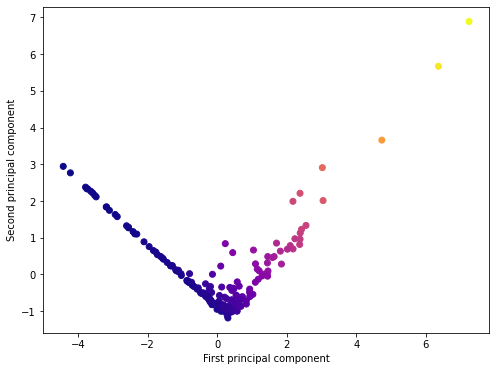

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['mean'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

In [23]:
x=df.iloc[:,0:]
y=target

In [24]:
x

,mean,variance,skewness,kurtosis
0,12.466769,351.389569,1.355803,4.392854
1,20.642700,1068.050678,1.362178,4.245450
2,16.890266,689.796409,1.694983,6.497073
3,4.183841,36.506889,1.246755,4.294954
4,12.672505,396.686673,1.346155,4.098919
...,...,...,...,...
195,2.160473,11.738305,3.003388,21.879141
196,2.361915,16.152642,2.700484,16.286828
197,2.785738,20.385035,1.756653,7.542381
198,1.618096,7.691294,4.579863,40.843504


In [25]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
195,0
196,0
197,0
198,0


In [26]:
from sklearn.model_selection import train_test_split
x_Train,x_Test,y_Train,y_Test =train_test_split(x,y,train_size =.8)

In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [28]:
import numpy as np
from sklearn.utils.multiclass import is_multilabel

In [29]:
model.fit(x_Train,y_Train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
?# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 7),
              "min_samples_leaf": randint(1, 7),
              "criterion": ["gini", "entropy"]}

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()


# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

tree_cv.fit(xTrain, yTrain)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Object `` not found.
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 3}
Best score is 0.8642857142857142


In [31]:
y_pred = tree_cv.predict(x_Test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test,y_pred))

0.9


In [33]:
dtc_acc = accuracy_score(y_Test,y_pred)
print(dtc_acc)

0.9


In [35]:
results = pd.DataFrame()
results

""


In [62]:
tempResults = pd.DataFrame({'Algorithm':['Decision tree Classifier Method'], 'Accuracy':[dtc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.750
0,SVM-Linear Karnel Classifier Method,0.825
0,KNN Classifier Method,0.850
0,Decision tree Classifier Method,0.900


In [37]:
##Logistic Regression

In [38]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(x_Train, y_Train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.8625


In [39]:
y_pred = logreg_cv.predict(x_Test)

In [40]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [41]:
y_Test

,target
176,0
48,1
140,0
193,0
55,1
197,0
60,1
70,1
42,1
5,1


In [43]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test, y_pred))

0.75


In [44]:
lr_acc = accuracy_score(y_Test, y_pred)
print(lr_acc)

0.75


In [45]:
results = pd.DataFrame()
results

""


In [46]:
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression Method'], 'Accuracy':[lr_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.75


In [47]:
##SVM-Linear

In [48]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_Train, y_Train)

#Predict the response for test dataset
y_pred = clf.predict(x_Test)

In [49]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_Test, y_pred)
cm

array([[16,  1],
       [ 6, 17]])

In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test, y_pred))

0.825


In [51]:
svm_lin_acc = accuracy_score(y_Test, y_pred)
print(svm_lin_acc)

0.825


In [52]:
tempResults = pd.DataFrame({'Algorithm':['SVM-Linear Karnel Classifier Method'], 'Accuracy':[svm_lin_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.750
0,SVM-Linear Karnel Classifier Method,0.825


In [87]:

#KNN


In [54]:

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(x_Train, y_Train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}


In [55]:
# Predicting the Test set results
y_pred = model1.predict(x_Test)

In [56]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_Test, y_pred)
cm

array([[16,  1],
       [ 5, 18]])

In [57]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_Test, y_pred))

0.85


In [58]:
knn_acc = accuracy_score(y_Test, y_pred)
print(knn_acc)

0.85


In [59]:
tempResults = pd.DataFrame({'Algorithm':['KNN Classifier Method'], 'Accuracy':[knn_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.750
0,SVM-Linear Karnel Classifier Method,0.825
0,KNN Classifier Method,0.850


In [60]:
##RandomForest

In [ ]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

In [76]:
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.datasets import make_classification
xTrain, yTrain = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(xTrain, yTrain)
RandomForestClassifier(...)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=Ellipsis,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(clf.predict(y_Test,y_pred))

In [78]:
RandomForestClassifier(max_depth=2, random_state=0)
print(clf.feature_importances_)


[0.14205973 0.76664038 0.0282433  0.06305659]


In [80]:
y_pred = clf.predict(x_Test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [81]:
accuracy_score(y_Test, y_pred)

0.575

In [83]:
rfc_acc = accuracy_score(y_Test,y_pred)
print(rfc_acc)

0.575


In [84]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.750
0,SVM-Linear Karnel Classifier Method,0.825
0,KNN Classifier Method,0.850
0,Decision tree Classifier Method,0.900
0,Random Forest Classifier Method,0.575
